In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir():
    if file.endswith(".csv"):
        n += 1

print(n)

70


In [3]:
#Importo los promedios, que van a ser todos los .csv dividido dos (ya que hay el doble, porque las desviaciones están aparte)
data=[]
for i in range(int(n/2)):
    i=i+1
    data.append(pd.read_csv(f"promedio_{i}.csv"))

data=pd.concat(data)
#print(data)

In [4]:
#Armo el eje x, el tiempo, en escala de días

t_0=np.array([0,11/24,15/24,1+2/24, 1+6.5/24, 1+17/24, 1+21/24, 2 +1/24, 2+5/24]) #hasta la carpeta 6 inclusive

t_7=2+ np.array([10.30/24,15.30/24,20.30/24, 1+1.30/24, 1+6.30/24, 1+11.30/24]) #correspondiente a la carpeta 7

t_8=3+ np.array([18/24,1,1+6/24,1+12/24,1+18/24])

t_9=np.array([5+8/24]) #correspondiente a carpeta 9

t_10=5+ np.array([14/24,20/24,1+2/24,1+8/24,1+14/24,1+20/24,2+2/24,2+8/24,2+14/24]) #carpeta 10

#FALLA, SE PIERDEN 5 DATOS: 1.25 días
#falla=7+np.array([20/24,1+2/24,1+8/24,1+14/24,1+20/24])

t_11= t_10[-1] + 5*6/24 + 6/24+ np.arange(0,6*6/24,6/24) #LE SUMO EL FALLO, LAS 5 MEDICIONES

t_12=np.array([t_11[-1]+(16.5-8)/24])

t_13=t_12+(23.5-16.5)/24

t_14=t_13+14/24 #fueron 14 horas después de la última medición

t_15=t_14[-1] + (18.30-13.30)/24 + np.array([0,3/24,6/24,9/24]) #archivo 15, 3 mediciones buenas y una maso

t_16= t_15[-1] + (12-3)/24 + np.arange(0,11*3/24,3/24) #le sumo el fallo

t_17= t_16[-1]+(23.30 - 18.30)/24 + np.arange(0,15*3/24,3/24) 

t_18 = t_17[-1]+(21.30 - 17.30)/24 + np.arange(0,2*3/24,3/24) 

t_19= t_18[-1]+(11.30 - 0.30)/24 + np.arange(0,11*3/24,3/24) 

t_20 = t_19[-1]+(24+3 - 17)/24 + np.arange(0,6*3/24,3/24)

t_21=t_20[-1]+(24+7.45-18.3)/24 + np.arange(0,3*3/24,3/24) #3 mediciones

t_22=t_21[-1] + (18-13.45)/24 + np.arange(0,1*3/24,3/24) 

t_23=t_22 + (21.10-18)/24 + np.arange(0,5*3/24,3/24) #5 mediciones - 11 de abril

t_24= t_23[-1] + (20.10-09.10)/24+np.arange(0,5*3/24,3/24)

t_25=t_24[-1] + (13-8)/24+np.arange(0,3*3/24,3/24)

t_26=t_25[-1] + (22.45-19)/24+np.arange(0,5*3/24,3/24) #5 mediciones, 13 de abril

t_27=t_26[-1] + (16-10.45)/24+np.arange(0,4*3/24,3/24)

t_28=t_27[-1] + (11-1)/24+np.arange(0,21*3/24,3/24) #21 mediciones del 15 de abril,hasta 17/04 a las 20 h.

t_29=t_28[-1] + (24+21.30-20)/24+np.arange(0,11*3/24,3/24)

t_30=t_29[-1] + (24-06.30)/24+np.arange(0,3*3/24,3/24)

t_31=t_30[-1] + (11.40-6)/24+np.arange(0,6*3/24,3/24)

t_32=t_31[-1] + (09.20-02.40)/24+np.arange(0,37*3/24,3/24)

t_33=t_32[-1] + (24+23.20-21.20)/24+np.arange(0,2*3/24,3/24)

t_34=t_33[-1] + (24+1-2.20)/24+np.arange(0,21*3/24,3/24)

t_35=t_34[-1] + (24-13)/24+np.arange(0,9*3/24,3/24)

t=np.concatenate((t_0,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35))#,t_12))
print(len(t))

224


In [5]:
c_1=np.array([data['promedio1']]) #Blanco
c_2=np.array([data['promedio2']]) #Starch
c_3=np.array([data['promedio3']]) #TPS
c_4=np.array([data['promedio4']]) #TPS-NPTiO

print(len(c_1[0]))

224


La fórmula es 
m= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), C la concentración y T el tiempo entre una medición y otra; suponiendo que tal concentración se mantiene constante.

Como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [6]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(h,C): #meter el área
    return F *C*h*60* 44 / (den)

#Se le introduce la cantidad de horas a la cual se va a proyectar (h) y la CONCENTRACIÓN
#Se proyecta que eso emite durante 6h, pero como tiene que estar en minutos, se multiplica por 6*60

In [7]:
#RECORDAR QUE [incluye:noincluye]

#Los primeros 5 los proyecto por 6 h
#Del 5 al 9 los proyecto por 4 h
#Del 9 al 15 los proyecto por 5 h
#Del 15 al 20 los proyecto por 6h
#El 21, que corresponde a la carpeta 9, lo proyecto por 6 h
#El 40 al 43, carpeta 15, lo proyecto por 3 h

gramos1=np.concatenate((gramos(6,c_1[0][0:5]),gramos(4,c_1[0][5:10]),gramos(5,c_1[0][10:16]),gramos(6,c_1[0][16:39]),gramos(3,c_1[0][39:])))
gramos2=np.concatenate((gramos(6,c_2[0][0:5]),gramos(4,c_2[0][5:10]),gramos(5,c_2[0][10:16]),gramos(6,c_2[0][16:39]),gramos(3,c_2[0][39:])))
gramos3=np.concatenate((gramos(6,c_3[0][0:5]),gramos(4,c_3[0][5:10]),gramos(5,c_3[0][10:16]),gramos(6,c_3[0][16:39]),gramos(3,c_3[0][39:])))
gramos4=np.concatenate((gramos(6,c_4[0][0:5]),gramos(4,c_4[0][5:10]),gramos(5,c_4[0][10:16]),gramos(6,c_4[0][16:39]),gramos(3,c_4[0][39:])))

T=np.concatenate((np.full(5,6),np.full(5,4),np.full(6,5),np.full(23,6),np.full(len(c_1[0])-39,3))) #T en la ecuación de g

In [8]:
gramos1_ac=np.add.accumulate(gramos1)
gramos2_ac=np.add.accumulate(gramos2)
gramos3_ac=np.add.accumulate(gramos3)
gramos4_ac=np.add.accumulate(gramos4)

Vemos los errores:
$m= \frac{F CT *44}{22414 * 0.001 * 10^6}$

$\sigma_m ^2 = ( \frac{CT *44}{22414 * 0.001 * 10^6}\sigma_F )^2 + ( \frac{F T*44}{22414 * 0.001 * 10^6}\sigma_{C})^2$

con $\sigma_F=0.1$ , $\sigma_C$ el error estadístico al hacer el promedio

In [10]:
#Importo las desviaciones

data_std=[]
for i in range(int(n/2)):
    i=i+1
    data_std.append(pd.read_csv(f"promedio_std_{i}.csv"))

data_std=pd.concat(data_std)


c_1_std=np.array([data_std['promedio_std1']]) #Blanco
c_2_std=np.array([data_std['promedio_std2']]) #Starch
c_3_std=np.array([data_std['promedio_std3']]) #TPS
c_4_std=np.array([data_std['promedio_std4']]) #TPS-NPTiO

print(len(c_1_std[0]))

224


In [11]:
def error(C,C_error,T):
    #Introducir Concentración, su desviación y el tiempo que se consideró que se mantendría tal concetración
    sigma_F=0.1
    sigma_C=50+C_error #Considero como error el error estadístico más el sistemático
    A=sigma_F*C*T*60*44/den
    B=sigma_C*F*T*60*44/den
    return (A**2 + B**2)

In [12]:
error_g1=error(c_1[0],c_1_std[0],T) #var
error_g2=error(c_2[0],c_2_std[0],T) #var
error_g3=error(c_3[0],c_3_std[0],T) #var
error_g4=error(c_4[0],c_4_std[0],T) #var

In [13]:
error_g1_ac=np.add.accumulate(error_g1)
error_g2_ac=np.add.accumulate(error_g2)
error_g3_ac=np.add.accumulate(error_g3)
error_g4_ac=np.add.accumulate(error_g4)

Al ser acumulado y sumar siempre el anterior, el error será la suma en cuadratura

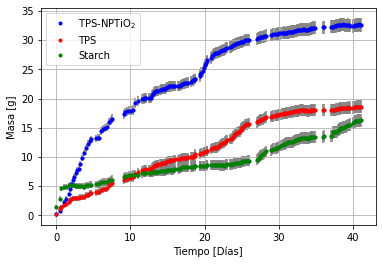

In [22]:
plt.errorbar(t,gramos2_ac-gramos1_ac,yerr=(error_g2_ac+error_g1_ac)**0.5,fmt='.',color='gray',zorder=1)
plt.errorbar(t,gramos3_ac-gramos1_ac,yerr=(error_g3_ac+error_g1_ac)**0.5,fmt='.',color='gray',zorder=1)
plt.errorbar(t,gramos4_ac-gramos1_ac,yerr=(error_g4_ac+error_g1_ac)**0.5,fmt='.',color='gray',zorder=1)

plt.plot(t,gramos4_ac-gramos1_ac,'.',label='TPS-NPTiO$_2$',color='blue',zorder=2)
plt.plot(t,gramos3_ac-gramos1_ac,'.',label='TPS',color='red',zorder=2)
plt.plot(t,gramos2_ac-gramos1_ac,'.',label='Starch',color='green',zorder=2)

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor.png")
plt.show()